In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Projeto de Classificação

In [149]:
## Informações de pacientes, o objetivo é classificar em doente ou saudável

n_persons = 10000
#0: Saudável
#1: Doente

data = {
    'Idade': np.random.randint(20, 80, n_persons),
    'IMC': np.random.uniform(10,40, n_persons),
    'Nivel de Glicose': np.random.uniform(70, 200, n_persons),
    'Pressao': np.random.uniform(60, 80, n_persons),
    'Temperatura': np.random.uniform(35, 40, n_persons),
    'Estado': np.random.choice([0,1], size=n_persons, p=[0.5, 0.5])
}

In [150]:
df = pd.DataFrame(data) #Convertendo dicionário para dataframe
df

,Idade,IMC,Nivel de Glicose,Pressao,Temperatura,Estado
0,41,10.265684,99.849644,60.774265,35.005951,0
1,31,29.249874,137.359735,70.053028,37.326140,0
2,71,15.422324,130.446392,71.184012,38.453074,1
3,59,35.103688,111.424026,64.570048,37.939929,1
4,64,31.482174,138.062939,69.345169,35.017729,0
...,...,...,...,...,...,...
9995,77,10.587110,174.285447,71.933726,35.893256,0
9996,54,34.313532,76.852245,74.006980,37.358108,0
9997,46,29.137068,97.416654,66.586330,37.748561,1
9998,68,11.656462,129.089919,75.964427,38.763448,0


In [151]:
## Adicionar valores nulos de propósito

columns_to_add_nan = ['Temperatura', 'IMC']

for col in columns_to_add_nan:
    selected_person_index = np.random.choice(df.index, size=500)
    df.loc[selected_person_index, col] = np.nan

In [152]:
size_outliers = 100
outlier_temp_high = np.random.uniform(40, 50, size_outliers)
outlier_temp_low = np.random.uniform(15, 35, size_outliers)
selected_person_index_temp = np.random.choice(df.index, size=size_outliers)
df.loc[selected_person_index_temp, 'Temperatura'] = outlier_temp_high

selected_person_index_temp = np.random.choice(df.index, size=size_outliers)
df.loc[selected_person_index_temp, 'Temperatura'] = outlier_temp_low

### Análise Exploratória

In [153]:
## Verificar se o dataframe tem valores nulos

df.describe()

,Idade,IMC,Nivel de Glicose,Pressao,Temperatura,Estado
count,10000.000000,9509.000000,10000.000000,10000.000000,9523.000000,10000.000000
mean,49.552700,24.977812,135.436342,69.930504,37.497676,0.500700
std,17.458628,8.596970,37.434071,5.760434,2.057040,0.500025
min,20.000000,10.004175,70.021447,60.001943,15.341953,0.000000
25%,35.000000,17.659989,102.871868,64.934763,36.261877,0.000000
50%,49.000000,24.937905,136.495233,69.861068,37.559254,1.000000
75%,65.000000,32.318929,167.651097,74.980571,38.794194,1.000000
max,79.000000,39.997901,199.999818,79.999326,49.975540,1.000000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             10000 non-null  int64  
 1   IMC               9509 non-null   float64
 2   Nivel de Glicose  10000 non-null  float64
 3   Pressao           10000 non-null  float64
 4   Temperatura       9523 non-null   float64
 5   Estado            10000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


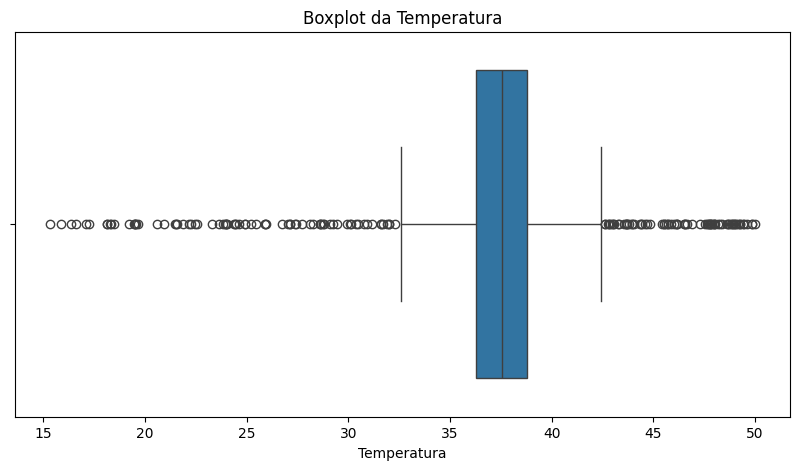

In [155]:
plt.figure(figsize=[10,5]);
sns.boxplot(x=df['Temperatura']);
plt.title('Boxplot da Temperatura');

In [156]:
## O que fazer com dados faltantes?
## Podemos substituir os valores faltantes pela média ou mediana
df.fillna(df.median(), inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Idade             10000 non-null  int64  
 1   IMC               10000 non-null  float64
 2   Nivel de Glicose  10000 non-null  float64
 3   Pressao           10000 non-null  float64
 4   Temperatura       10000 non-null  float64
 5   Estado            10000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 468.9 KB


### Pré-Processamento dos dados

In [158]:
df.head()

,Idade,IMC,Nivel de Glicose,Pressao,Temperatura,Estado
0,41,10.265684,99.849644,60.774265,35.005951,0
1,31,29.249874,137.359735,70.053028,37.326140,0
2,71,15.422324,130.446392,71.184012,38.453074,1
3,59,35.103688,111.424026,64.570048,37.939929,1
4,64,31.482174,138.062939,69.345169,35.017729,0


In [159]:
#Divisão em atributos e rótulos
X = df.drop(columns=['Estado'])
y = df['Estado']

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Treinar os modelos de classificação

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid,
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Definir os hiperparâmetros para buscar os melhores valores
param_grid = {
    'n_estimators': [300,500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

grid_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("Melhores Hiperparâmetros:", grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   6.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  11.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  13.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  13.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   9.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   9.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  18.8s
[CV] END max_depth=20, min_sam

In [163]:
rf = grid_search.best_estimator_

In [164]:
y_pred = rf.predict(X_test_scaled)

In [165]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.49      0.51      1005
           1       0.52      0.55      0.53       995

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.52      0.52      0.52      2000



### Avaliar a qualidade/desempenho do modelo

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52     10031
           1       0.50      0.47      0.49      9969

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



Text(70.72222222222221, 0.5, 'true')

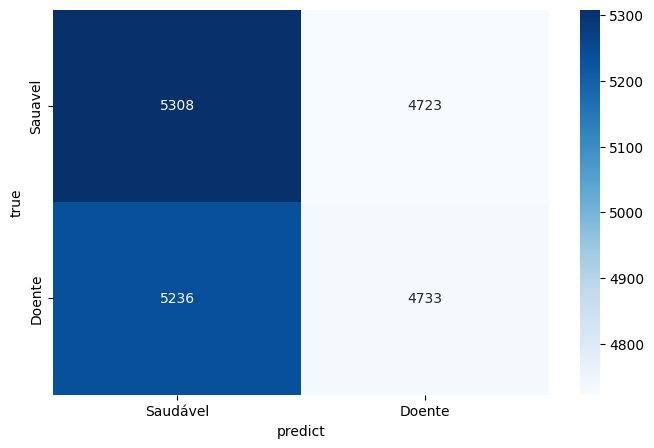

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=[8,5])
sns.heatmap(cf_matrix, annot=True, fmt='d', xticklabels=['Saudável', 'Doente'], yticklabels=['Sauavel', 'Doente'], cmap='Blues')
plt.xlabel('predict')
plt.ylabel('true')

Text(70.72222222222221, 0.5, 'true')

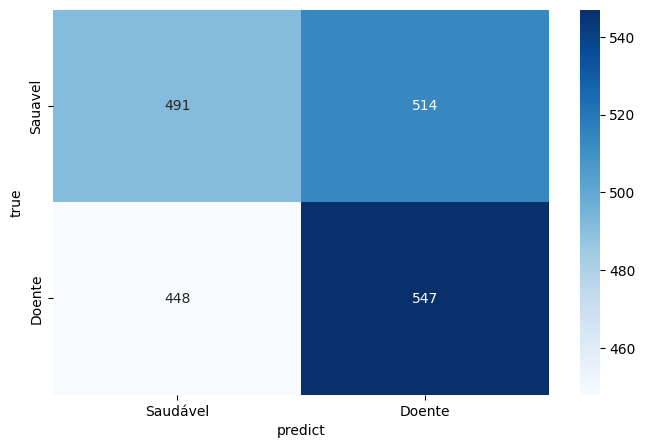

In [166]:
cf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=[8,5])
sns.heatmap(cf_matrix, annot=True, fmt='d', xticklabels=['Saudável', 'Doente'], yticklabels=['Sauavel', 'Doente'], cmap='Blues')
plt.xlabel('predict')
plt.ylabel('true')

### Testar outros modelos de classificação